<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%2010%20Gas-Condensate%20Reservoirs/notebook/10_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 10. Gas/Condensate Reservoirs**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
!git clone https://github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 1206 (delta 23), reused 0 (delta 0), pack-reused 1145
Receiving objects: 100% (1206/1206), 16.89 MiB | 21.17 MiB/s, done.
Resolving deltas: 100% (544/544), done.


## Functions

In [ ]:
def condensate_belowdew(Bg, Bo, Rs, Rv, p, cw, cf, sw, We, Bw, Wp, Wi, Np, Gp, Gi):
  "Condensate reservoir material balance below dewpoint"
  Rsi, Rvi = Rs[0], Rv[0]
  Bgi, pi = Bg[0], p[0]
  deltaP = p - pi

  Btg = ((Bg * (1 - (Rs * Rvi))) + (Bo * (Rvi - Rv))) / (1 - (Rv * Rs))
  Bto = ((Bo * (1 - (Rv * Rsi))) + (Bg * (Rsi - Rs))) / (1 - (Rv * Rs))
  Eg = Btg - Bgi
  Efw = ((cf + (cw * sw)) / (1 - sw)) * deltaP
  deltaW = We - (Bw * (Wp - Wi))
  F = (Np * ((Bo - (Rs * Bg)) / (1 - (Rv * Rs)))) + ((Gp - Gi) * ((Bg - (Rv * Bo)) / (1 - (Rv * Rs))))
  return(F)

def condensate_abovedew(Bg, Rv, p, cw, cf, sw, We, Bw, Wp, Wi, Np, Gp, Gi):
  "Condensate reservoir material balance above dewpoint"
  Rvi = Rv[0]
  Rs = 1 / Rvi # theoretical
  Bo = Bg * Rs # theoretical

  Bgi, pi = Bg[0], p[0]
  deltaP = p - pi

  Eg = Bg - Bgi
  Efw = ((cf + (cw * sw)) / (1 - sw)) * deltaP
  deltaW = We - (Bw * (Wp - Wi))
  F = Bg * (Gp - Gi)
  return(F)

## Example 10.1 

Task 1. Plot Bto, Btg, Rs, Rv vs. pressure

Task 2. Calculate original gas (OGIP) and condensate (OCIP) in place using Plot 10.1

$$OCIP=G_{fgi} \cdot R_{vi}$$

### Task 1

In [ ]:
# Task 1. Make plots vs pressure

# knowns: cf, cw negligible
P_dew = 3428 # dewpoint pressure, psia

p = np.array([3558, 3428, 3000, 2400, 1800, 1200, 700]) # psia
Np = np.array([0, 410, 1160, 2520, 3930, 5060, 6150]) * 1000 # STB
Gp = np.array([0, 2.8, 9.4, 20, 35, 49, 60]) * 1E+09 # scf
Wp = np.array([0, 0, 0, 0, 0, 0, 0]) # STB
Bg = np.array([.74311, .7722, .82457, .97304, 1.30459, 1.99091, 3.54322]) # RB/Mscf
Bg = Bg * 1E-3 # convert RB/Mscf to RB/scf
Bo = np.array([np.nan, 1.76766, 1.65259, 1.54709, 1.3605, 1.1914, 1.07162]) # RB/stb
Rs = np.array([np.nan, 2155.55, 1555.46, 1020.55, 637.632, 290.637, 107.997]) # scf/STB
Rv = np.array([148, 148, 87.5105, 50.2976, 33.4408, 27.4227, 29.5971]) # STB/MMscf
Rv = Rv * 1E-6 # convert STB/MMscf to STB/scf

# reservoir state relative to dewpoint
states = []
for i in range(len(p)):
  if p[i] > P_dew:
    state = 'above dew'
  else:
    state = 'below dew'
  states.append(state)

data = pd.DataFrame({'p': p, 'Np': Np, 'Gp': Gp, 'Wp': Wp, 'Bg': Bg, 'Bo': Bo, 'Rs': Rs, 'Rv': Rv, 'State': states})
print('Table Data')
data

Table Data


,p,Np,Gp,Wp,Bg,Bo,Rs,Rv,State
0,3558,0,0.000000e+00,0,0.000743,NaN,NaN,0.000148,above dew
1,3428,410000,2.800000e+09,0,0.000772,1.76766,2155.550,0.000148,below dew
2,3000,1160000,9.400000e+09,0,0.000825,1.65259,1555.460,0.000088,below dew
3,2400,2520000,2.000000e+10,0,0.000973,1.54709,1020.550,0.000050,below dew
4,1800,3930000,3.500000e+10,0,0.001305,1.36050,637.632,0.000033,below dew
5,1200,5060000,4.900000e+10,0,0.001991,1.19140,290.637,0.000027,below dew
6,700,6150000,6.000000e+10,0,0.003543,1.07162,107.997,0.000030,below dew


$B_{oi}$ and $R_{si}$ are unknown, they can be calculated using theoretical Equation.

$$R_{si}=\frac{1}{R_{vi}}$$

$$B_{oi}=B_{gi}R_{si}$$

In [ ]:
Rsi = 1 / Rv[0]
Boi = Bg[0] * Rsi

# change NaN value of Rs[0] and Bo[0] with the calculated Rsi, Boi
Rs[0] = Rsi
Bo[0] = Boi

data = pd.DataFrame({'p': p, 'Np': Np, 'Gp': Gp, 'Wp': Wp, 'Bg': Bg, 'Bo': Bo, 'Rs': Rs, 'Rv': Rv, 'State': states})
print('Table Data with Calculated Rsi and Boi')
data

Table Data with Calculated Rsi and Boi


,p,Np,Gp,Wp,Bg,Bo,Rs,Rv,State
0,3558,0,0.000000e+00,0,0.000743,5.021014,6756.756757,0.000148,above dew
1,3428,410000,2.800000e+09,0,0.000772,1.767660,2155.550000,0.000148,below dew
2,3000,1160000,9.400000e+09,0,0.000825,1.652590,1555.460000,0.000088,below dew
3,2400,2520000,2.000000e+10,0,0.000973,1.547090,1020.550000,0.000050,below dew
4,1800,3930000,3.500000e+10,0,0.001305,1.360500,637.632000,0.000033,below dew
5,1200,5060000,4.900000e+10,0,0.001991,1.191400,290.637000,0.000027,below dew
6,700,6150000,6.000000e+10,0,0.003543,1.071620,107.997000,0.000030,below dew


In [ ]:
Rsi, Rvi = Rs[0], Rv[0] # from Equation 10.8, Rsi=1/Rvi

Btg = ((Bg * (1 - (Rs * Rvi))) + (Bo * (Rvi - Rv))) / (1 - (Rv * Rs)) # in RB/STB
Bto = ((Bo * (1 - (Rv * Rsi))) + (Bg * (Rsi - Rs))) / (1 - (Rv * Rs)) # in RB/scf

Gi = 0
F = (Np * ((Bo - (Rs * Bg)) / (1 - (Rv * Rs)))) + ((Gp - Gi) * ((Bg - (Rv * Bo)) / (1 - (Rv * Rs))))
Eg = Btg - Bg[0] 

# create Table 10.2
param = pd.DataFrame({'p': p, 'Bto': Bto, 'Btg': Btg, 'F': F, 'Eg': Eg})
param

,p,Bto,Btg,F,Eg
0,3558,5.021014,0.000743,0.000000e+00,0.000000
1,3428,5.217568,0.000772,2.161494e+06,0.000029
2,3000,5.746473,0.000850,7.895469e+06,0.000107
3,2400,6.960145,0.001030,2.034505e+07,0.000287
4,1800,9.232915,0.001366,4.715129e+07,0.000623
5,1200,13.955334,0.002065,9.985011e+07,0.001322
6,700,24.493627,0.003625,2.156165e+08,0.002882


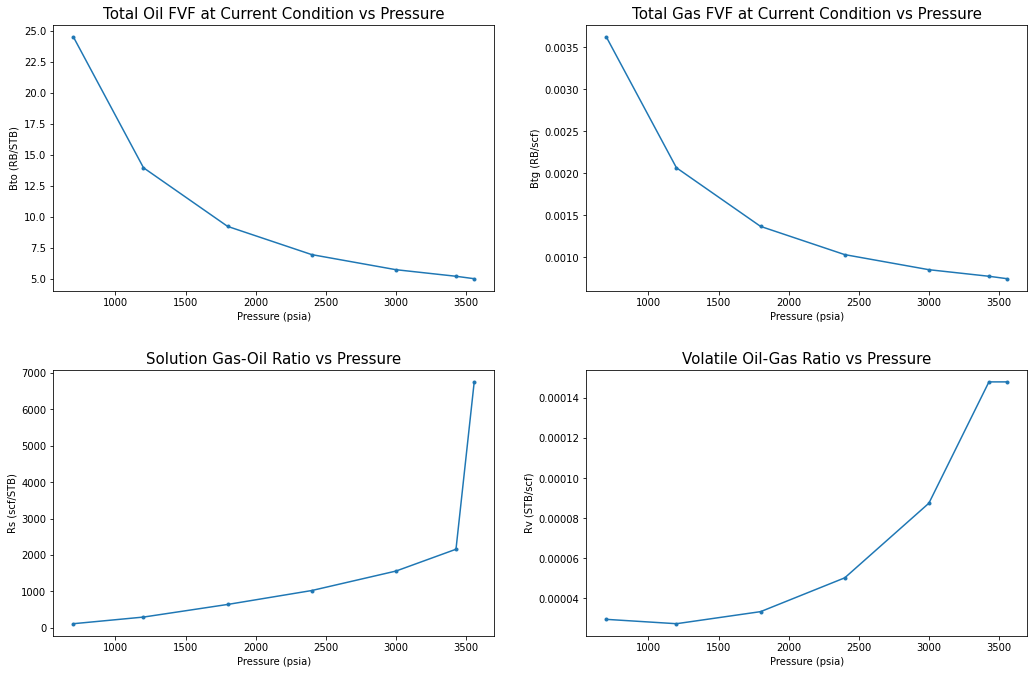

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(p, Bto, '.-')
plt.title('Total Oil FVF at Current Condition vs Pressure', size=15)
plt.xlabel('Pressure (psia)'); plt.ylabel('Bto (RB/STB)')

plt.subplot(2,2,2)
plt.plot(p, Btg, '.-')
plt.title('Total Gas FVF at Current Condition vs Pressure', size=15)
plt.xlabel('Pressure (psia)'); plt.ylabel('Btg (RB/scf)')

plt.subplot(2,2,3)
plt.plot(p, Rs, '.-')
plt.title('Solution Gas-Oil Ratio vs Pressure', size=15)
plt.xlabel('Pressure (psia)'); plt.ylabel('Rs (scf/STB)')

plt.subplot(2,2,4)
plt.plot(p, Rv, '.-')
plt.title('Volatile Oil-Gas Ratio vs Pressure', size=15)
plt.xlabel('Pressure (psia)'); plt.ylabel('Rv (STB/scf)')

plt.tight_layout(pad=3.0)
plt.show()

### Task 2

I don't know why the `scipy.optimize.curve_fit` doesn't work, maybe because `F` is too large (`1E+8`). So, I use the traditional linear fitting from `utilities.py` in the repository.

In [ ]:
import sys
sys.path.append('/content/reservoir-engineering')
from utilities import *

In [ ]:
b, a = simple_linear_regression_traditional(Eg, F)

Calculated Original Gas in Place: 74.98044416614195 Bscf
Initial volatile oil-gas ratio: 0.000148 STB/scf
Calculated Original Condensate in Place: 11.097105736589008 MMSTB


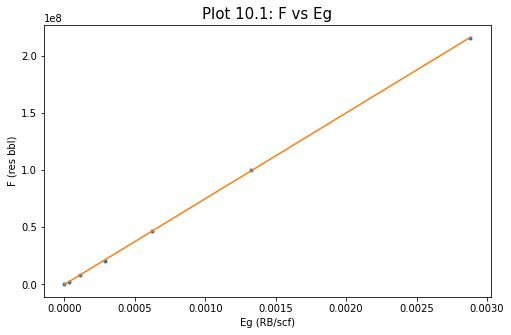

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(Eg, F, '.')
plt.title('Plot 10.1: F vs Eg', size=15)
plt.xlabel('Eg (RB/scf)'); plt.ylabel('F (res bbl)')

y = a * Eg
print('Calculated Original Gas in Place:', a * 1E-9, 'Bscf')

# calculate original condensate in place: Gfgi * Rvi
print('Initial volatile oil-gas ratio:', Rvi, 'STB/scf')
condensate_in_place = a * Rvi
print('Calculated Original Condensate in Place:', condensate_in_place * 1E-6, 'MMSTB')

plt.plot(Eg, y)
plt.show()

## Example 10.2 (Not solved yet)

In [ ]:
# knowns
pi = 5713 # initial pressure, psig
Pd = 4000 # dewpoint pressure, psig
temp = 186 # temperature at which CVD study was done, fahrenheit
zi = 1.107 # gas compressibility factor at 186 F
area = 113149 # reservoir productive area, acre
poro = 0.1 # porosity
h = 10 # thickness, ft
swi = 0.2 # initial water saturation

# data Table 10.4
measured_in = np.array(['Wellstream (Mscf)', 'Stock-tank Liquid (bbl)',
                        'Primary-separator gas (Mscf)', 'Second-stage gas (Mscf)',
                        'Stock-tank gas (Mscf)'])
ifip = np.array([1000, 135.7, 757.87, 96.68, 24.23]) # initial fluid in place
p4000 = np.zeros(5) # measured in 4000 psig (dewpoint)
p3500 = np.array([53.74, 6.4, 41.95, 4.74, 1.21])
p2900 = np.array([154.38, 15.4, 124.78, 12.09, 3.16])
p2100 = np.array([350.96, 24, 301.57, 20.75, 5.61])
p1300 = np.array([576.96, 29.7, 512.32, 27.95, 7.71])
p605 = np.array([767.87, 35.1, 685.02, 37.79, 10.4])
p0 = np.array([935.15, np.nan, np.nan, np.nan, np.nan])
print('Table 10.4 Calculated Cumulative Recovery (per MMscf of Original Fluid) During Depletion')
data = pd.DataFrame({'Measured in': measured_in, 'Initial Fluid in Place': ifip, '@4000 psig': p4000, '@3500 psig': p3500, '@2900 psig': p2900, '@2100 psig': p2100, '@1300 psig': p1300, '@605 psig': p605, '@0 psig': p0})
data

Table 10.4 Calculated Cumulative Recovery (per MMscf of Original Fluid) During Depletion


,Measured in,Initial Fluid in Place,@4000 psig,@3500 psig,@2900 psig,@2100 psig,@1300 psig,@605 psig,@0 psig
0,Wellstream (Mscf),1000.00,0.0,53.74,154.38,350.96,576.96,767.87,935.15
1,Stock-tank Liquid (bbl),135.70,0.0,6.40,15.40,24.00,29.70,35.10,NaN
2,Primary-separator gas (Mscf),757.87,0.0,41.95,124.78,301.57,512.32,685.02,NaN
3,Second-stage gas (Mscf),96.68,0.0,4.74,12.09,20.75,27.95,37.79,NaN
4,Stock-tank gas (Mscf),24.23,0.0,1.21,3.16,5.61,7.71,10.40,NaN


Calculate hydrocarbon pore space

In [ ]:
import sys
sys.path.append('/content/reservoir-engineering/Unit 2 Review of Rock and Fluid Properties/functions')
from gasfvf import *

temp = temp + 460 # fahrenheit to rankine
Bgi = gasfvf(zi, temp, pi) # result in ft3/scf
Bgi = ((1 / 43560) / 0.178108) # convert to acre-ft/bbl

" calculate hydrocarbon pore space "
Gfgi = (area * poro * (1 - swi)) / Bgi
print('Hydrocarbon pore space:', Gfgi, 'bbl')

Hydrocarbon pore space: 70228275.64220162 bbl


Cumulative recovery. Calculate in-place reserves at original reservoir pressure of 5713 psig

Cumulative recovery. Calculate in-place reserves at dewpoint of 4000 psig

Cumulative recovery (production below the dewpoint with abandonment pressure assumed to be 605 psig)

Total recoverable reserves

## Example 10.3

Task. Calculate Bg, Bo, Rs, Rv, from CVD experiment

In [3]:
# data
j = np.arange(1, 8, 1) # index
p = np.array([4014.7, 3514.7, 2914.7, 2114.7, 1314.7, 619.7, 14.7])
temp = np.full(7, 186)
separator_first = np.array([np.nan, 41.95, 124.78, 301.57, 512.32, 674.90, 757.87])
separator_second = np.array([np.nan, 4.74, 12.09, 20.75, 27.95, 37.23, 96.68])
separator_third = np.array([np.nan, 1.21, 3.16, 5.61, 7.71, 10.25, 24.23])
Gp_j = np.array([0, 47.9, 140.03, 327.93, 547.98, 722.37, 878.78])
Gp_j = Gp_j * 1E+03
Np_j = np.array([0, 7.21, 15.4, 24, 29.7, 35.1, 135.7])
z_j = np.array([.867, .799, .748, .762, .819, .902, np.nan])
z2_j = np.array([.867, .802, .744, .704, .671, .576, np.nan])
Vo_j = np.array([0, .033, .194, .239, .225, .181, np.nan])

cvd = pd.DataFrame({'j': j, 'p': p, 'temp': temp, 'separator_first': separator_first,
                    'separator_second': separator_second, 'separator_third': separator_third,
                    'Gp_j': Gp_j, 'Np_j': Np_j, 'z_j': z_j, 'z2_j': z2_j, 'Vo_j': Vo_j})
cvd

,j,p,temp,separator_first,separator_second,separator_third,Gp_j,Np_j,z_j,z2_j,Vo_j
0,1,4014.7,186,NaN,NaN,NaN,0.0,0.00,0.867,0.867,0.000
1,2,3514.7,186,41.95,4.74,1.21,47900.0,7.21,0.799,0.802,0.033
2,3,2914.7,186,124.78,12.09,3.16,140030.0,15.40,0.748,0.744,0.194
3,4,2114.7,186,301.57,20.75,5.61,327930.0,24.00,0.762,0.704,0.239
4,5,1314.7,186,512.32,27.95,7.71,547980.0,29.70,0.819,0.671,0.225
5,6,619.7,186,674.90,37.23,10.25,722370.0,35.10,0.902,0.576,0.181
6,7,14.7,186,757.87,96.68,24.23,878780.0,135.70,NaN,NaN,NaN


In [8]:
# calculate gas FVF (Bg)
Bg = (0.00503676 * z_j * (temp + 460)) / p # in RB/scf

# initial gas FVF
Bgi = Bg[0]

# initial Gfg
Gfgi = Gp_j[-1] # in scf

# initial Nfo
Nfoi = Np_j[-1]

# calculate initial Vtg (Vtg1)
Vtg1 = Gfgi * Bgi # in res bbl

# initial values for Eq 10.14
ntj_nt1 = 1
delta_ngj_to_nt1 = 0

# empty arrays for appending
Vtoj_arr = []; ntj_nt1_arr = []; Vtoj_Vtgj_arr = []; Vtgj_arr = []
delta_Vtgj_arr = []; ngj_nt1_arr = []; delta_ngj_to_ngj_arr = []
delta_ngj_to_nt1_arr = []; delta_Gpj_arr = []; delta_Npj_arr = []
Gfgj_arr = []; Nfgj_arr = []; Gj_arr = []; Nj_arr = []; Gfoj_arr = []; 
Nfoj_arr = []; Boj_arr = []; Bgj_arr = []; Rsj_arr = []; Rvj_arr = []

for i in range(len(j)-1):

  # Eq 10.13
  Vtoj = Vo_j[i] * Vtg1
  Vtoj_arr.append(Vtoj)

  # Eq 10.14
  ntj_nt1 = ntj_nt1 - delta_ngj_to_nt1
  ntj_nt1_arr.append(ntj_nt1)

  # Eq 10.15
  Vtoj_Vtgj = ((Vtg1 * z2_j[i] * p[0]) / (z2_j[0] * p[i])) * (ntj_nt1)
  Vtoj_Vtgj_arr.append(Vtoj_Vtgj)

  # Eq 10.16
  Vtgj = Vtoj_Vtgj - Vtoj
  Vtgj_arr.append(Vtgj)

  # Eq 10.17
  delta_Vtgj = Vtoj_Vtgj - Vtg1
  delta_Vtgj_arr.append(delta_Vtgj)

  # Eq 10.18
  ngj_nt1 = (Vtgj * z_j[0] * p[i]) / (z_j[i] * Vtg1 * p[0])
  ngj_nt1_arr.append(ngj_nt1)

  # Eq 10.19
  delta_ngj_to_ngj = delta_Vtgj / Vtgj
  delta_ngj_to_ngj_arr.append(delta_ngj_to_ngj)

  # Eq 10.20
  delta_ngj_to_nt1 = delta_ngj_to_ngj * ngj_nt1
  delta_ngj_to_nt1_arr.append(delta_ngj_to_nt1)

  if i == 0:
    # Eq 10.21
    delta_Gpj = Gp_j[i] - 0

    # Eq 10.22
    delta_Npj = Np_j[i] - 0

    # Eq 10.23
    Gj = Gfgi - delta_Gpj

    # Eq 10.24
    Nj = Nfoi - delta_Gpj

    # Eq 10.25
    Gfgj = Gfgi

    # Eq 10.26
    Nfgj = Nfoi

  if i > 0:
    # Eq 10.21
    delta_Gpj = Gp_j[i] - Gp_j[i-1]

    # Eq 10.22
    delta_Npj = Np_j[i] - Np_j[i-1]
  
    # Eq 10.23
    Gj = Gj - delta_Gpj_arr[-1]

    # Eq 10.24
    Nj = Nj - delta_Npj_arr[-1]

    # Eq 10.25
    Gfgj = (Vtgj * delta_Gpj) / delta_Vtgj

    # Eq 10.26
    Nfgj = (Vtgj * delta_Npj) / delta_Vtgj
  
  delta_Gpj_arr.append(delta_Gpj)
  delta_Npj_arr.append(delta_Npj)
  Gj_arr.append(Gj)
  Nj_arr.append(Nj)
  Gfgj_arr.append(Gfgj)
  Nfgj_arr.append(Nfgj)

  # Eq 10.27
  Gfoj = Gj - Gfgj
  Gfoj_arr.append(Gfoj)

  # Eq 10.28
  Nfoj = Nj - Nfgj
  Nfoj_arr.append(Nfoj)

  # Eq 10.29
  Boj = Vtoj / Nfoj
  Boj_arr.append(Boj)

  # Eq 10.30
  Bgj = (Vtgj / Gfgj) * 1E+03  # result in RB/Mscf  
  Bgj_arr.append(Bgj) 

  # Eq 10.31
  Rsj = Gfoj / Nfoj
  Rsj_arr.append(Rsj)

  # Eq 10.32
  Rvj = (Nfgj / Gfgj) * 1E+06 # result in STB/MMscf 
  Rvj_arr.append(Rvj)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in double_scalars


In [9]:
cvd_result = pd.DataFrame({'Eq 10.13': Vtoj_arr, 'Eq 10.14': ntj_nt1_arr, 'Eq 10.15': Vtoj_Vtgj_arr, 'Eq 10.16': Vtgj_arr,
                           'Eq 10.17': delta_Vtgj_arr, 'Eq 10.18': ngj_nt1_arr, 'Eq 10.19': delta_ngj_to_ngj_arr,
                           'Eq 10.20': delta_ngj_to_nt1_arr, 'Eq 10.21': delta_Gpj_arr, 'Eq 10.22': delta_Npj_arr,
                           'Eq 10.23': Gj_arr, 'Eq 10.24': Nj_arr, 'Eq 10.25': Gfgj_arr, 'Eq 10.26': Nfgj_arr, 
                           'Eq 10.27': Gfoj_arr, 'Eq 10.28': Nfoj_arr, 'Bo (RB/STB)': Boj_arr, 'Bg (RB/Mscf)': Bgj_arr, 
                           'Rs (scf/STB)': Rsj_arr, 'Rv (STB/Mscf)': Rvj_arr})
cvd_result

,Eq 10.13,Eq 10.14,Eq 10.15,Eq 10.16,Eq 10.17,Eq 10.18,Eq 10.19,Eq 10.20,Eq 10.21,Eq 10.22,Eq 10.23,Eq 10.24,Eq 10.25,Eq 10.26,Eq 10.27,Eq 10.28,Bo (RB/STB),Bg (RB/Mscf),Rs (scf/STB),Rv (STB/Mscf)
0,0.000000,1.000000,617.490015,617.490015,0.000000,1.000000,0.000000,0.000000,0.0,0.00,878780.0,135.70,878780.000000,135.700000,0.000000,0.000000,NaN,0.702667,NaN,154.418626
1,20.377170,1.000000,652.454223,632.077053,34.964208,0.972406,0.055316,0.053790,47900.0,7.21,878780.0,135.70,865928.106932,130.341162,12851.893068,5.358838,3.802535,0.729942,2398.261083,150.521921
2,119.793063,0.946210,690.606346,570.813283,73.116332,0.777898,0.128092,0.099642,92130.0,8.19,830880.0,128.49,719251.454611,63.938667,111628.545389,64.551333,1.855780,0.793621,1729.298848,88.896125
3,147.580114,0.846568,805.841572,658.261458,188.351557,0.638893,0.286135,0.182810,187900.0,8.60,738750.0,120.30,656683.332401,30.055757,82066.667599,90.244243,1.635341,1.002403,909.383962,45.769026
4,138.935253,0.663758,968.656485,829.721231,351.166470,0.465812,0.423234,0.197148,220050.0,5.70,550850.0,111.70,519924.801053,13.467718,30925.198947,98.232282,1.414354,1.595849,314.817068,25.903204
5,111.765693,0.466611,1240.107989,1128.342296,622.617974,0.271114,0.551799,0.149600,174390.0,5.40,330800.0,106.00,316039.082178,9.786175,14760.917822,96.213825,1.161639,3.570262,153.417846,30.965078


General (for below dewpoint)

$$F=G_{fgi}Eg+\Delta W+G_{fgi}B_{gi}E_{fw}$$

where $E_g=B_{tg}-B_{gi}$

$$E_{fw}=(\frac{c_f+c_wS_{wi}}{1-S_{wi}}) \Delta P$$

$$\Delta W=W_e-B_w(W_p-W_I)$$

$$B_{tg}=\frac{B_g(1-R_sR_{vi})+B_o(R_{vi}-R_v)}{1-R_vR_s}$$

$$B_{to}=\frac{B_o(1-R_vR_{si})+B_g(R_{si}-R_s)}{1-R_vR_s}$$

$$F=N_p(\frac{B_o-R_sB_g}{1-R_vR_s})+(G_p-G_I)(\frac{B_g-R_vB_o}{1-R_vR_s})$$

Without water injection:

$$W_I=0$$

Above dewpoint:

$$R_v=R_{vi}=\frac{N_p}{G_p}$$

$B_{tg}=B_g$ (similar to dry-gas reservoir)

$E_g=B_g-B_{gi}$ (similar to dry-gas reservoir)

All the produced gas is re-injected: $G_p-G_I=0$

$B_o$ and $R_s$ are not defined, but can be shown theoretically that:

$$R_s=\frac{1}{R_{vi}}$$

$$B_o=\frac{B_g}{R_{vi}}=B_gR_s$$